In [1]:
require(rpart)
require(randomForest)
require(RColorBrewer)
require(rattle)
require(rpart.plot)
require(party)

Loading required package: rpart
Loading required package: randomForest
randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.
Loading required package: RColorBrewer
Loading required package: rattle
Rattle: A free graphical interface for data mining with R.
Versión 4.1.0 Copyright (c) 2006-2015 Togaware Pty Ltd.
Escriba 'rattle()' para agitar, sacudir y  rotar sus datos.
Loading required package: rpart.plot
Loading required package: party
Loading required package: grid
Loading required package: mvtnorm
Loading required package: modeltools
Loading required package: stats4
Loading required package: strucchange
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: sandwich


In [2]:
d.all <- read.csv(file.path("..","data", "final", "clean.csv"))
head(d.all)

ID,magnitude,Cadence,duration,latitude,longitude,Teff,Teff_error,logg,logg_error,Type,var_lc,num_peaks,median_peaks,mad_peaks
1,16.8,1800,27.38,9.84,108.10,4354,300,-999.00,-999.00,Trans/Eclipse,2.572494e+00,2,29.86858,41.75269
2,6.0,1800,82.17,65.38,108.08,8000,200,-999.00,-999.00,Trans/Eclipse,9.459850e+05,19,57.12909,55.69576
3,15.5,1800,27.37,49.41,246.24,2754,250,-999.00,-999.00,LPV;MIRA,2.589982e+02,2,31.12475,11.37836
4,13.8,120,27.40,42.44,226.11,16160,130,3.91,0.16,SPB,4.066555e+01,9,127.49338,68.59015
5,14.6,20,27.40,52.68,180.44,8000,200,-999.00,-999.00,Trans/Eclipse,1.204713e-01,611,4899.64632,4507.44102
6,10.3,1800,54.79,40.29,283.81,2780,250,-999.00,-999.00,LPV;MIRA,6.048815e+06,2,28.92632,14.50562


In [3]:
set.seed(1)

sample_size <- floor(0.75 * nrow(d.all))

d.train_ind <- sample(seq_len(nrow(d.all)), size = sample_size)

d.train <- d.all[d.train_ind, ]
d.test  <- d.all[-d.train_ind, ]

In [4]:
head(d.all)

ID,magnitude,Cadence,duration,latitude,longitude,Teff,Teff_error,logg,logg_error,Type,var_lc,num_peaks,median_peaks,mad_peaks
1,16.8,1800,27.38,9.84,108.10,4354,300,-999.00,-999.00,Trans/Eclipse,2.572494e+00,2,29.86858,41.75269
2,6.0,1800,82.17,65.38,108.08,8000,200,-999.00,-999.00,Trans/Eclipse,9.459850e+05,19,57.12909,55.69576
3,15.5,1800,27.37,49.41,246.24,2754,250,-999.00,-999.00,LPV;MIRA,2.589982e+02,2,31.12475,11.37836
4,13.8,120,27.40,42.44,226.11,16160,130,3.91,0.16,SPB,4.066555e+01,9,127.49338,68.59015
5,14.6,20,27.40,52.68,180.44,8000,200,-999.00,-999.00,Trans/Eclipse,1.204713e-01,611,4899.64632,4507.44102
6,10.3,1800,54.79,40.29,283.81,2780,250,-999.00,-999.00,LPV;MIRA,6.048815e+06,2,28.92632,14.50562


## Simple decision tree

Warning message in polygon(x[, i], y[, i], col = col[i], border = border.col[i], :
“semi-transparencia no esta soportado en este dispositivo: reportado solo una vez por pagina”

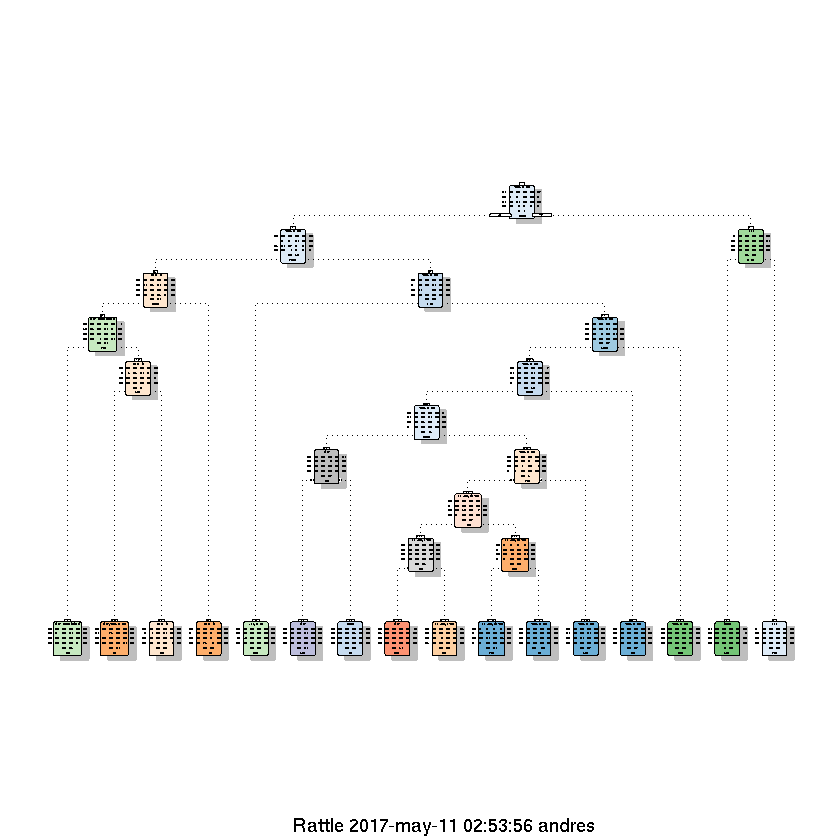

In [5]:
fit.tree <- rpart(Type ~ magnitude + Teff + logg + num_peaks + median_peaks + mad_peaks,
                  data = d.train, method = "class")
fit.tree.prediction <- predict(fit.tree, d.test, type = "class")
fancyRpartPlot(fit.tree)

In [6]:
paste("Training accuracy:",
      sum(predict(fit.tree, d.train, type = "class") == d.train$Type) / nrow(d.train) * 100, "%")
paste("Prediction accuracy:",
      sum(predict(fit.tree, d.test, type = "class") == d.test$Type) / nrow(d.test) * 100, "%")

[1] "Training accuracy: 79.52 %"

[1] "Prediction accuracy: 79.2 %"

## Random forest

In [7]:
d.train[is.na(d.train$num_peaks), "median_peaks"] <- 0
d.train[is.na(d.train$num_peaks), "mad_peaks"] <- 0
d.train[is.na(d.train$num_peaks), "num_peaks"] <- 0

d.test[is.na(d.test$num_peaks), "median_peaks"] <- 0
d.test[is.na(d.test$num_peaks), "mad_peaks"] <- 0
d.test[is.na(d.test$num_peaks), "num_peaks"] <- 0

### Feature importances

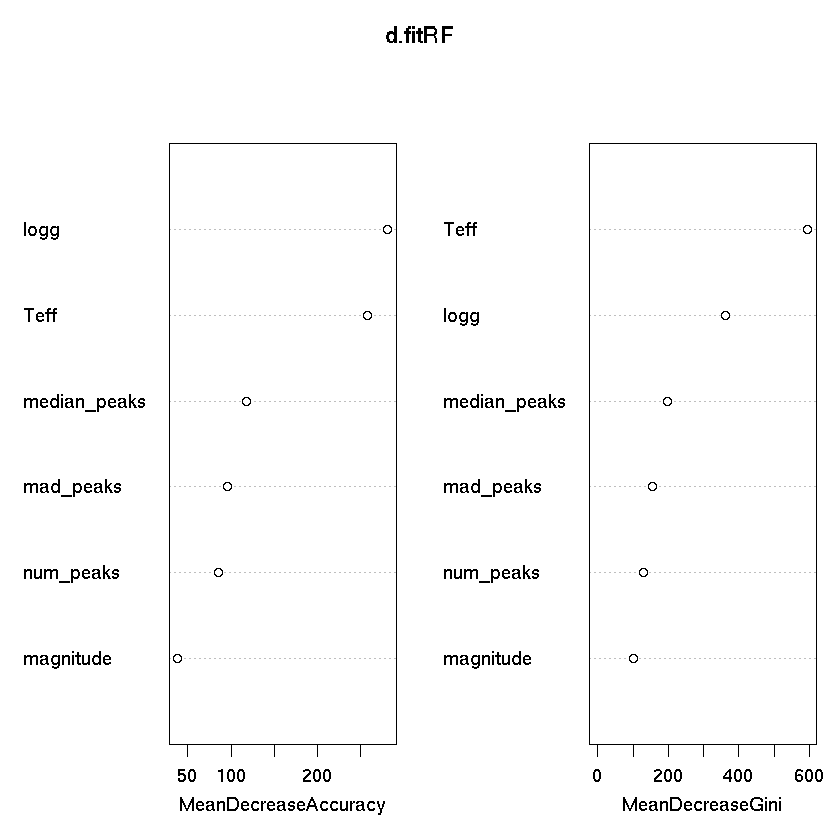

In [8]:
d.fitRF <- randomForest(Type ~ magnitude + Teff + logg + num_peaks + median_peaks + mad_peaks,
                        data = d.train,
                        importance = TRUE, ntree = 2000)
varImpPlot(d.fitRF)

In [9]:
## Make the predictions
paste("Training accuracy:",
      sum(predict(d.fitRF, d.train, type = "class") == d.train$Type) / nrow(d.train) * 100, "%")
paste("Prediction accuracy:",
      sum(predict(d.fitRF, d.test, type = "class") == d.test$Type) / nrow(d.test) * 100, "%")

[1] "Training accuracy: 99.4133333333333 %"

[1] "Prediction accuracy: 86.72 %"